# Розрахункова робота 
## Верзун Поліни
КМ-81
Варіант 2

Всі розрахунки з коментарями знаходяться в кінці файлу

Всі розрахунки надані до 4 знаку після коми

In [100]:
import matplotlib.pyplot as plt
import numpy as np

In [101]:
def f(x,y,n=2):
    '''
    Count function in every point
    '''
    return 3*(x-n)**2-x*y+4*(y)**2


def add_positive(x0, y0, la0, dx, x, direction_norm):
    return f(
        x0 + ((la0 + dx) * x) / direction_norm, y0 + ((la0 + dx) * y) / direction_norm,
    )


def add_negative(x0, y0, la0, dx, x, direction_norm):
    return f(
        x0 + ((la0 - dx) * x) / direction_norm, y0 + ((la0 - dx) * y) / direction_norm,
    )

# Алгоритм Свена для інтервалів невизначеності

In [102]:
def svenn_method(direction, start, la0=0):

    x0 = start[0]
    y0 = start[1]

    x = direction[0]
    y = direction[1]

    direction_norm = (x ** 2 + y ** 2) ** (1 / 2)  # Вычисляем норму направления

    starting_point_norm = (x0 ** 2 + y0 ** 2) ** (
        1 / 2
    )  # Норма початкової точки

    dx = 0.1 * (starting_point_norm / direction_norm)

    values_list = [
        f(
            x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm
        )
    ]
    la_list = [la0]  # лямди

    # Наступний напрям
    if (
        add_negative(x0, y0, la0, dx, x, direction_norm)
        > f(
            x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm
        )
    ) and (
        f(
            x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm
        )
        > add_positive(x0, y0, la0, dx, x, direction_norm)
    ):
        determinator = 1
        values_list.append(
            add_positive(x0, y0, la0, dx, x, direction_norm)
        )
        la_list.append(la0 + dx)
    elif (
        add_negative(x0, y0, la0, dx, x, direction_norm)
        < f(
            x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm
        )
    ) and (
        f(
            x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm
        )
        < add_positive(x0, y0, la0, dx, x, direction_norm)
    ):
        determinator = -1
        values_list.append(
            add_negative(x0, y0, la0, dx, x, direction_norm)
        )
        la_list.append(la0 - dx)
    elif (
        add_negative(x0, y0, la0, dx, x, direction_norm)
        > f(
            x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm
        )
    ) and (
        f(
            x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm
        )
        < add_positive(x0, y0, la0, dx, x, direction_norm)
    ):
        return [la0 - dx, la0 + dx]

    i = 1

    while values_list[i] < values_list[i - 1]:

        la_i = la_list[i] + determinator * (2 ** i) * dx
        la_list.append(la_i)

        values_list.append(
            f(
                x0 + ((la_i) * x) / direction_norm, y0 + ((la_i) * y) / direction_norm
            )
        )

        i += 1

    last4 = [
        la_list[i],
        (la_list[i] + la_list[i - 1]) / 2,
        la_list[i - 1],
        la_list[i - 2],
    ]
    last4_evaluated = []

    for la in last4:
        last4_evaluated.append(
            f(
                x0 + ((la) * x) / direction_norm, y0 + ((la) * y) / direction_norm
            )
        )

    inx = last4_evaluated.index(
        min(last4_evaluated)
    )  # лямда з найменшим значенням f 

    if last4_evaluated[1] == min(last4_evaluated):
        return sorted([last4[2], last4[0]])

    elif last4_evaluated[2] == min(last4_evaluated):
        return sorted([last4[3], last4[1]])


# Алгоритм Свена

In [103]:
def svenn_DSK(direction, start, la0=0):
    x0 = start[0]
    y0 = start[1]

    x = direction[0]
    y = direction[1]

    direction_norm = (x ** 2 + y ** 2) ** (1 / 2)

    nX = (x0 ** 2 + y0 ** 2) ** (1 / 2)

    dx = 0.1 * (nX / direction_norm)

    values_list = [
        f(x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm)
    ]
    la_list = [la0]

    if (
        add_negative(x0, y0, la0, dx, x, direction_norm)
        > f(x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm)
    ) and (
        f(x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm)
        > add_positive(x0, y0, la0, dx, x, direction_norm)
    ):
        determinator = 1
        values_list.append(add_positive(x0, y0, la0, dx, x, direction_norm))
        la_list.append(la0 + dx)
    elif (
        add_negative(x0, y0, la0, dx, x, direction_norm)
        < f(x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm)
    ) and (
        f(x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm)
        < add_positive(x0, y0, la0, dx, x, direction_norm)
    ):
        determinator = -1
        values_list.append(add_negative(x0, y0, la0, dx, x, direction_norm))
        la_list.append(la0 - dx)
    elif (
        add_negative(x0, y0, la0, dx, x, direction_norm)
        > f(x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm)
    ) and (
        f(x0 + ((la0) * x) / direction_norm, y0 + ((la0) * y) / direction_norm)
        < add_positive(x0, y0, la0, dx, x, direction_norm)
    ):
        return [la0 - dx, la0, la0 + dx]

    i = 1

    while values_list[i] < values_list[i - 1]:

        la_i = la_list[i] + determinator * (2 ** i) * dx
        la_list.append(la_i)

        values_list.append(
            f(x0 + ((la_i) * x) / direction_norm, y0 + ((la_i) * y) / direction_norm)
        )

        i += 1

    last4 = [
        la_list[i],
        (la_list[i] + la_list[i - 1]) / 2,
        la_list[i - 1],
        la_list[i - 2],
    ]
    last4_evaluated = []

    for la in last4:
        last4_evaluated.append(
            f(x0 + ((la) * x) / direction_norm, y0 + ((la) * y) / direction_norm)
        )

    inx = last4_evaluated.index(min(last4_evaluated))

    if inx == 1:
        last3 = [last4[0], last4[1], last4[2]]
    if inx == 2:
        last3 = [last4[1], last4[2], last4[3]]

    return last3


# Метод Дихотомії

In [104]:
def dichotomy_method(start, svenn, direction):
    x0 = start[0]
    y0 = start[1]

    x = direction[0]
    y = direction[1]

    direction_norm = (x ** 2 + y ** 2) ** (1 / 2)

    current_interval = svenn

    L = current_interval[1] - current_interval[0]

    # Середина интервала
    la_m = (current_interval[1] + current_interval[0]) / 2

    # Точки слева и справа от середины
    la_1 = (current_interval[0] + la_m) / 2
    la_2 = (current_interval[1] + la_m) / 2

    while L > 0.01:

        if f(
            x0 + (la_1 * x) / direction_norm, y0 + (la_1 * y) / direction_norm
        ) < f(
            x0 + (la_m * x) / direction_norm, y0 + (la_m * y) / direction_norm
        ):
            current_interval = [current_interval[0], la_m]

        if f(
            x0 + (la_m * x) / direction_norm, y0 + (la_m * y) / direction_norm
        ) > f(
            x0 + (la_2 * x) / direction_norm, y0 + (la_2 * y) / direction_norm
        ):
            current_interval = [la_m, current_interval[1]]

        if (
            f(
                x0 + (la_1 * x) / direction_norm, y0 + (la_1 * y) / direction_norm
            )
            > f(
                x0 + (la_m * x) / direction_norm, y0 + (la_m * y) / direction_norm
            )
        ) and (
            (
                f(
                    x0 + (la_m * x) / direction_norm, y0 + (la_m * y) / direction_norm
                )
                < f(
                    x0 + (la_2 * x) / direction_norm, y0 + (la_2 * y) / direction_norm
                )
            )
        ):
            current_interval = [la_1, la_2]

        la_m = (current_interval[1] + current_interval[0]) / 2

        la_1 = (current_interval[0] + la_m) / 2
        la_2 = (current_interval[1] + la_m) / 2

        L = L / 2

    return (
        current_interval[0] + current_interval[1]
    ) / 2  # Середина интервала, который остался


# Метод золотого перетину

In [105]:
def gold(start, svenn, direction):

    x0 = start[0]
    y0 = start[1]

    x = direction[0]
    y = direction[1]

    direction_norm = (x ** 2 + y ** 2) ** (1 / 2)

    current_interval = svenn

    L = current_interval[1] - current_interval[0]

    la_1 = current_interval[0] + 0.382 * L
    la_2 = current_interval[0] + 0.618 * L

    while L > 0.01:
        # Визначаємо, яку частину інтервалу відкинути
        if f(
            x0 + (la_1 * x) / direction_norm, y0 + (la_1 * y) / direction_norm
        ) < f(
            x0 + (la_2 * x) / direction_norm, y0 + (la_2 * y) / direction_norm
        ):
            current_interval = [current_interval[0], la_2]
        if f(
            x0 + (la_1 * x) / direction_norm, y0 + (la_1 * y) / direction_norm
        ) > f(
            x0 + (la_2 * x) / direction_norm, y0 + (la_2 * y) / direction_norm
        ):
            current_interval = [la_1, current_interval[1]]

        L = current_interval[1] - current_interval[0]

        la_1 = current_interval[0] + 0.382 * L
        la_2 = current_interval[0] + 0.618 * L

    return (current_interval[0] + current_interval[1]) / 2


# Метод ДСК-Пауела

In [106]:
def DSK_Pauel(start, svenn, direction):

    x0 = start[0]
    y0 = start[1]

    x = direction[0]
    y = direction[1]

    direction_norm = (x ** 2 + y ** 2) ** (1 / 2)

    last3 = sorted(svenn)  # 3 равноудалённых точки
    dx = abs(last3[1] - last3[0])
    x1 = last3[0]
    x2 = last3[1]
    x3 = last3[2]

    f1 = f(x0 + (x1 * x) / direction_norm, y0 + (x1 * y) / direction_norm)
    f2 = f(x0 + (x2 * x) / direction_norm, y0 + (x2 * y) / direction_norm)
    f3 = f(x0 + (x3 * x) / direction_norm, y0 + (x3 * y) / direction_norm)

    x_dsk = x2 + (dx * (f1 - f3)) / (2 * (f1 - 2 * f2 + f3))

    f_dsk = f(
        x0 + (x_dsk * x) / direction_norm, y0 + (x_dsk * y) / direction_norm
    )

    if ((x2 - x_dsk) < 0.01) and ((f2 - f_dsk) < 0.01):
        return x_dsk

    x_top = x_dsk

    end = False

    while end != True:
        list_x = sorted([x1, x2, x3, x_top])  # Сортируем в порядке возрастания
        inx_x_top = list_x.index(x_top)

        try:
            list_x = [list_x[inx_x_top - 1], list_x[inx_x_top], list_x[inx_x_top + 1]]
        except:
            try:
                list_x = [
                    list_x[inx_x_top],
                    list_x[inx_x_top + 1],
                    list_x[inx_x_top + 2],
                ]
            except:
                list_x = [
                    list_x[inx_x_top - 2],
                    list_x[inx_x_top - 1],
                    list_x[inx_x_top],
                ]

        x1 = list_x[0]
        x2 = list_x[1]
        x3 = list_x[2]

        f1 = f(
            x0 + (x1 * x) / direction_norm, y0 + (x1 * y) / direction_norm
        )
        f2 = f(
            x0 + (x2 * x) / direction_norm, y0 + (x2 * y) / direction_norm
        )
        f3 = f(
            x0 + (x3 * x) / direction_norm, y0 + (x3 * y) / direction_norm
        )

        a1 = (f2 - f1) / (x2 - x1)
        a2 = (1 / (x3 - x2)) * ((f3 - f1) / (x3 - x1) - (f2 - f1) / (x2 - x1))

        x_top = (x1 + x2) / 2 - a1 / (2 * a2)

        f_x_top = f(
            x0 + (x_top * x) / direction_norm, y0 + (x_top * y) / direction_norm
        )

        f_list_udirection_normorted = [f1, f2, f3, f_x_top]
        list_x_udirection_normorted = [x1, x2, x3, x_top]

        f_min = min(f_list_udirection_normorted)

        inx_min = f_list_udirection_normorted.index(f_min)
        x_min = list_x_udirection_normorted[inx_min]

        if ((f_min - f_x_top) < 0.01) and (x_min - x_top < 0.01):
            end = True  # Критерий окончания
    return x_top


Ітерація 1 Методом Спряжених Напрямів Пауела: 

 Напрям: [0,1].
 Початкова точка: [-6.4,-6.4] 

 Інтервал невизначеності лямда: [2.7153,9.9561] 

 Метод дихотомії: 
 Оптимальне значення лямда: 5.6003

 Отримана точка: [-6.4,-0.7997] 


Ітерація 2 Методом Спряжених Напрямів Пауела: 

 Напрям: [1,0].
 Початкова точка: [-6.4,-0.7997] 

 Інтервал невизначеності лямда: [4.5148,14.8345] 

 Метод золотого перетину: 
 Оптимальне значення лямда: 8.268

 Отримана точка: [1.868,-0.7997] 


Ітерація 3 Методом Спряжених Напрямів Пауела: 

 Напрям: [0,1].
 Початкова точка: [1.868,-0.7997] 

 Інтервал невизначеності лямда: [0.6096,2.2352] 

 Метод ДСК-Пауела: 
 Оптимальне значення лямда: 1.0332


 Отримана точка: [1.868,0.2335] 


Ітерація 4 Методом Спряжених Напрямів Пауела: 

 Напрям: [0.992282096347016,0.12400097285574563].
 Початкова точка: [1.868,0.2335] 

 Інтервал невизначеності лямда: [-0.1883,0.1883] 

 Метод ДСК-Пауела: 
 Оптимальне значення лямда: 0.1759


 Отримана точка: [2.0426,0.2553] 

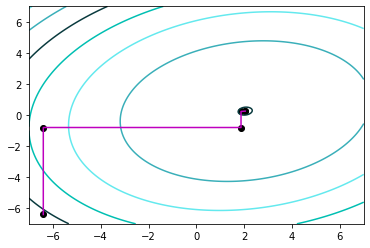

In [107]:
from termcolor import colored

start, stop, n_values = -7, 7, 2000

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.contour(
    X, Y, Z, colors=["#093A3E", "#3AAFB9", "#64E9EE", "#00BFB2"], extend="both"
)

start = [-6.4, -6.4]

j = 0
x_list = [start]

direction_norm = [[0, 1], [1, 0], [0, 1]]

end = False

while not end:
    print(colored(f"Ітерація {j+1} Методом Спряжених Напрямів Пауела: \n", "blue"))
    svenn = svenn_method(direction_norm[j], x_list[j])

    dir1 = direction_norm[j][0]
    dir2 = direction_norm[j][1]

    x_l1 = x_list[j][0]
    x_l2 = x_list[j][1]
    print(
        f" Напрям: [{dir1},{dir2}].\n Початкова точка: [{round(x_l1, 4)},{round(x_l2, 4)}] \n"
    )
    print(f" Інтервал невизначеності лямда: [{round(svenn[0], 4)},{round(svenn[1], 4)}] \n")

    if j == 0:
        optimal_lambda_value = dichotomy_method(x_list[j], svenn, direction_norm[j])
        print(
            f" Метод дихотомії: \n Оптимальне значення лямда: {round(optimal_lambda_value, 4)}"
        )
    elif j == 1:
        optimal_lambda_value = gold(x_list[j], svenn, direction_norm[j])
        print(
            f" Метод золотого перетину: \n Оптимальне значення лямда: {round(optimal_lambda_value, 4)}"
        )
    else:
        optimal_lambda_value = DSK_Pauel(
            x_list[j], svenn_DSK(direction_norm[j], x_list[j]), direction_norm[j]
        )
        print(
            f" Метод ДСК-Пауела: \n Оптимальне значення лямда: {round(optimal_lambda_value, 4)}\n"
        )

    xj_1 = [0, 0]
    xj_1[0] = x_list[j][0] + optimal_lambda_value * direction_norm[j][0]
    xj_1[1] = x_list[j][1] + optimal_lambda_value * direction_norm[j][1]

    x_list.append(xj_1)

    print(colored(f"\n Отримана точка: [{round(xj_1[0], 4)},{round(xj_1[1], 4)}] \n\n", "green"))

    if (j + 1) % 3 == 0:
        S_old = direction_norm[j]

        x = x_list[j + 1][0] - x_list[j - 1][0]
        y = x_list[j + 1][1] - x_list[j - 1][1]

        S_new = [x, y]
        direction_norm_new = (S_new[0] ** 2 + S_new[1] ** 2) ** (1 / 2)

        S_new[0] = S_new[0] / direction_norm_new
        S_new[1] = S_new[1] / direction_norm_new

        direction_norm.append(S_new)
        direction_norm.append(S_old)
        direction_norm.append(S_new)

    j += 1

    nX_1 = (x_list[j][0] ** 2 + x_list[j][1] ** 2) ** (1 / 2)
    nX = (x_list[j - 1][0] ** 2 + x_list[j - 1][1] ** 2) ** (1 / 2)

    if abs(nX_1 - nX) / nX_1 <= 0.01:
        end = True

print(f"\n\n Критерій закінчення виконується \n\n")

x_list[-1][0] = round(x_list[-1][0], 4)
x_list[-1][1] = round(x_list[-1][1], 4)

path = x_list

x_coords = []
for i in range(len(path)):
    x_coords.append(path[i][0])

y_coords = []
for i in range(len(path)):
    y_coords.append(path[i][1])
plt.scatter(x_coords, y_coords, color="#000000")
plt.plot(x_coords, y_coords, "m")

plt.show()


# Відповідь: [2.04, 0.26]